In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
book = pd.read_csv("Books.csv")
rat = pd.read_csv("Ratings.csv") 
user = pd.read_csv("Users.csv")

C:\Users\dipan\AppData\Local\Temp\ipykernel_3316\490005007.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  book = pd.read_csv("Books.csv")


In [3]:
print(book.shape,
rat.shape,
user.shape)

(271360, 8) (1149780, 3) (278858, 3)


In [4]:
print(book.isnull().sum(),'\n','\n',rat.isnull().sum(),'\n','\n',user.isnull().sum())

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64 
 
 User-ID        0
ISBN           0
Book-Rating    0
dtype: int64 
 
 User-ID          0
Location         0
Age         110762
dtype: int64


In [5]:
print(book.duplicated().sum(),'\n','\n',rat.duplicated().sum(),'\n','\n',user.duplicated().sum())

0 
 
 0 
 
 0


In [6]:
print(book.columns,"\n",rat.columns,"\n",user.columns)

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object') 
 Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object') 
 Index(['User-ID', 'Location', 'Age'], dtype='object')


In [7]:
# plt.scatter(user['User-ID'],user['Location'])

In [8]:
len(user['Age'].unique().tolist())

166

In [9]:
user['Age'].value_counts()

Age
24.0     5687
25.0     5618
26.0     5547
23.0     5456
27.0     5383
         ... 
220.0       1
143.0       1
140.0       1
189.0       1
127.0       1
Name: count, Length: 165, dtype: int64

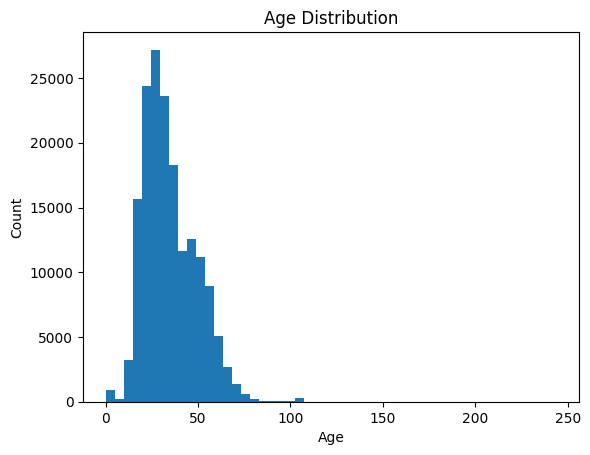

In [10]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(user['Age'], bins=50)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()


In [11]:
# plt.figure()
# plt.hist(rat['ISBN'], bins=50)
# plt.xlabel('ISBM')
# plt.ylabel('Count')
# plt.title('ISBM Distribution')
# plt.show()


In [12]:
book.head(1)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...


In [13]:
rat.head(1)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0


In [14]:
rating_with_name = rat.merge(book,on='ISBN')

In [15]:
rating_with_name.head(1)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [16]:
rating_with_name.shape

(1031136, 10)

In [17]:
num_rating_df = rating_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)

In [18]:
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [19]:
avg_rating_df = rating_with_name.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_ratings'},inplace=True)
avg_rating_df
# avg_rating_df = (rating_with_name.groupby('Book-Title')['Book-Rating'].mean().reset_index())
# avg_rating_df.rename(columns={'Book-Rating': 'avg_ratings'}, inplace=True)
# avg_rating_df

,Book-Title,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [20]:
user.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [21]:
user.shape

(278858, 3)

In [22]:
popularity_df = num_rating_df.merge(avg_rating_df,on='Book-Title')

In [23]:
popularity_df[popularity_df['num_ratings'] > 160].sort_values('avg_ratings',ascending=False).head(50)

,Book-Title,num_ratings,avg_ratings
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
60582,Ender's Game (Ender Wiggins Saga (Paperback)),249,5.409639
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191612,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
189274,The Giver (21st Century Reference),179,4.916201
94259,Ishmael: An Adventure of the Mind and Spirit,162,4.907407


In [24]:
popularity_df.merge(book,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','avg_ratings']]

,Book-Title,Book-Author,Image-URL-M,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,Karen Hesse,http://images.amazon.com/images/P/0590567330.0...,2.250000
1,Always Have Popsicles,Rebecca Harvin,http://images.amazon.com/images/P/0964147726.0...,0.000000
2,Apple Magic (The Collector's series),Martina Boudreau,http://images.amazon.com/images/P/0942320093.0...,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",Nancy N. Rue,http://images.amazon.com/images/P/0310232546.0...,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,Lou Mobley,http://images.amazon.com/images/P/0962295701.0...,0.000000
...,...,...,...,...
270291,Ã?Â?lpiraten.,Janwillem van de Wetering,http://images.amazon.com/images/P/3499232499.0...,0.000000
270292,Ã?Â?rger mit Produkt X. Roman.,Joan Aiken,http://images.amazon.com/images/P/325721538X.0...,5.250000
270293,Ã?Â?sterlich leben.,Anselm GrÃ?Â¼n,http://images.amazon.com/images/P/3451274973.0...,7.000000
270294,Ã?Â?stlich der Berge.,David Guterson,http://images.amazon.com/images/P/3442725739.0...,2.666667


#### Colaborative Filtering Based Recommandation System

In [25]:
x = rating_with_name.groupby('User-ID').count()['Book-Rating'] > 160
padheLikheUser = x[x].index

In [26]:
filtered_rating = rating_with_name[rating_with_name['User-ID'].isin(padheLikheUser)]

In [27]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating'] >= 50
famous_books = y[y].index

In [28]:
final_filter = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)] 

In [29]:
pt = final_filter.pivot_table(
    index='Book-Title',
    columns='User-ID',
    values='Book-Rating',
    aggfunc='mean'
)


In [30]:
pt

User-ID,254,1903,2033,2110,2276,2766,2891,2977,3363,4017,...,274301,274308,274808,275970,276680,277427,277478,277639,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
list(pt.index)

['1984',
 '1st to Die: A Novel',
 '2nd Chance',
 '4 Blondes',
 '84 Charing Cross Road',
 'A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash',
 'A Bend in the Road',
 'A Case of Need',
 'A Child Called \\It\\": One Child\'s Courage to Survive"',
 'A Civil Action',
 'A Cry In The Night',
 'A Darkness More Than Night',
 'A Day Late and a Dollar Short',
 'A Fine Balance',
 'A Great Deliverance',
 'A Heartbreaking Work of Staggering Genius',
 'A Is for Alibi (Kinsey Millhone Mysteries (Paperback))',
 'A Lesson Before Dying (Vintage Contemporaries (Paperback))',
 'A Light in the Window (The Mitford Years)',
 'A Man Named Dave: A Story of Triumph and Forgiveness',
 'A Man in Full',
 'A Map of the World',
 'A Painted House',
 'A Patchwork Planet',
 'A Prayer for Owen Meany',
 'A Thin Dark Line (Mysteries &amp; Horror)',
 "A Thousand Acres (Ballantine Reader's Circle)",
 'A Time to Kill',
 "A Virtuous Woman (Oprah's Book Club (Paperback))",
 'A Walk in the Woods: Re

In [32]:
pt.fillna(0,inplace=True)

In [33]:
pt.shape

(842, 1037)

In [34]:
from sklearn.metrics.pairwise import cosine_similarity

In [35]:
similarity_score = cosine_similarity(pt)

In [36]:
similarity_score.shape

(842, 842)

In [37]:
def recommand(book_name) : 
    index = np.where(pt.index == book_name)[0][0] 
    distance = similarity_score[index]
    similarItem = sorted(list(enumerate(similarity_score[index])),key=lambda x:x[1],reverse=True)[1:6]

    for i in similarItem: 
        print(pt.index[i[0]])

In [38]:
recommand('Message in a Bottle')

A Walk to Remember
Nights in Rodanthe
River's End
The Mulberry Tree
The Notebook


In [39]:
recommand('4 Blondes')

Seabiscuit
The Crimson Petal and the White
Pride and Prejudice
The House of the Spirits
Bridget Jones: The Edge of Reason
